In [93]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
import string
import random
from cmath import sqrt
%matplotlib widget

# Ejercicio 2
Implemente un algoritmo de optimizaciónn por enjambre de partículas y utilice el mismo para encontrar el mínimo global de las funciones del Ejercicio 1. Compare los resultados, en términos de las soluciones encontradas y de la velocidad de convergencia, obtenidos con este método y con el algoritmo genético.

dipercia me dijo q hagamos una animacion de los bichitos en cada tiempo osea iteracion

## Definición de las funciones a utilizar

In [94]:
def func_1 (x):
    f_x = - x* np.sin(np.sqrt(abs(x)))
    return f_x



In [95]:
def func_2 (x):
    f_x = x + 5*np.sin(3*x) + 8*np.cos(5*x)
    return f_x

In [96]:
def func_3 (x, y):
    a = x ** 2 + y ** 2
    f_x = np.power(a, 0.25) * (np.sin(50 * np.power(a, 0.1)) ** 2  + 1)
    return f_x

In [97]:
def actualizar_mejores (f,k,x,yk,yk_global,f_v,counter):
    #pregunto si tiene 1 o 2 dimensiones
    if(f==func_3):
        f_v.append(f(x[k][0],x[k][1]))
        #actualizacion de posiciones mejores
        if(f(x[k][0],x[k][1]) < f(yk[k][0],yk[k][1])):
            yk[k]=x[k]
        if(f(yk[k][0],yk[k][1]) < f(yk_global[0],yk_global[1])):
            yk_global=yk[k]
            counter=0
    else:
        f_v.append(f(x[k]))
        #actualizacion de posiciones mejores
        if(f(x[k]) < f(yk[k])):
            yk[k]=x[k]
        if(f(yk[k]) < f(yk_global)):
            yk_global=yk[k]
            counter=0
    return yk,yk_global,counter

In [98]:
def limitador (f,x,k,lim_inf,lim_sup):
    #pregunto si tiene 1 o 2 dimensiones
    if(f==func_3):
        #limitador en x
        if(x[k][0] < lim_inf):
            x[k][0] = lim_inf
        if(x[k][0] > lim_sup):
            x[k][0] = lim_sup
        #limitador en y
        if(x[k][1] < lim_inf):
            x[k][1] = lim_inf
        if(x[k][1] > lim_sup):
            x[k][1] = lim_sup
    else:
        if(x[k] < lim_inf):
            x[k] = lim_inf
        if(x[k] > lim_sup):
            x[k] = lim_sup
    return x

In [99]:
def alg_enjambre (particulas,lim_inf,lim_sup,f,c1,c2):
    
    if(f==func_3):
        x=np.random.uniform(lim_inf,lim_sup,(particulas,2)) #entradas
        v=np.zeros((x.shape[0],2)) #vector de velocidades
    else:
        x=np.random.uniform(lim_inf,lim_sup,particulas) #entradas
        v=np.zeros((x.shape[0],1)) #vector de velocidades
    #mejor posicion personal
    yk=np.copy(x)
    yk_global=yk[0] #mejor posicion global
    counter=0
    # print(v)
    # variables para animacion
    anim_x=[] 
    anim_y=[]
    while (counter!=16):
        # print(counter)
        f_v = []
        for k in range(particulas):
            # print(f'particula [{k}] f[x] = {f(x[k][0],x[k][1])} ,  f[yk] = {f(yk[k][0],yk[k][1])}  fk_globabl= {f(yk_global[0],yk_global[1])}')
            # print(f'particula [{k}] f[x] = {f(x[k])} ,  f[yk] = {f(yk[k])}  fk_globabl= {f(yk_global)}')
            yk,yk_global,counter=actualizar_mejores (f,k,x,yk,yk_global,f_v,counter)

        anim_x.append(x)
        anim_y.append(f_v)
        for k in range(particulas):
            #variables aleatorias
            r_1 = np.random.rand(x.ndim)
            r_2 = np.random.rand(x.ndim)
            #actualizacion de la velocidad
            v_next = v[k] + (c1*r_1)*(yk[k]-x[k]) + (c2*r_2)*(yk_global-x[k])
            # print(v_next,v[k])
            v[k] = v_next
            # if(c1!=0.1):
            #     c1=c1-0.01
            # if(c2!=1):
            #     c2=c2+0.01
            #actualizacion de la posicion
            x[k]=x[k]+v[k]
            x=limitador (f,x,k,lim_inf,lim_sup)
            # print(f'9  particula [{k}] f[yk] = {f(yk[k])}')
        counter= counter + 1
    return yk_global, anim_x, anim_y
          
    

## Resolución de la función 1

mínimo encontrado en el punto (421.39346210101337, -418.9601223371043)
llegó en 46 iteraciones


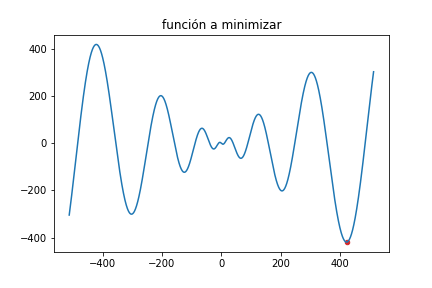

In [100]:
# Funcion a minimizar 

plt.close('all')
x = np.arange(-512, 512, 0.1)
y1 = func_1(x)
plt.figure()
min=np.argmin(y1)
plt.scatter(x[min], y1[min], s=20, c='C3')

plt.plot(x, y1), plt.title('función a minimizar')


# alg_enjambre (particulas, lim_inf, lim_sup, f, c1, c2)
winner, anim_x, anim_y = alg_enjambre(10, -512, 512, func_1, 0.1, 0.1)
print(f'mínimo encontrado en el punto ({winner}, {func_1(winner)})')
print(f'llegó en {len(anim_x)} iteraciones')

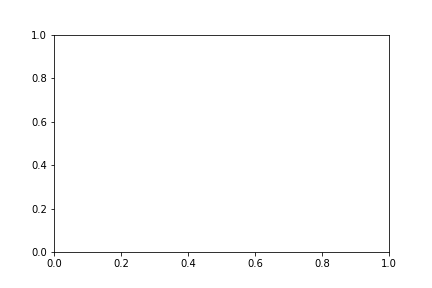

In [101]:
# animación
fig, ax = plt.subplots(1, 1)

def animate(i):
    ax.clear()
    point_x = anim_x[i]
    point_y = anim_y[i]
    ax.scatter(point_x, point_y, c = 'green')
    ax.set_title(f'Partículas it {i + 1}')
anim = FuncAnimation(fig, animate, frames=len(anim_x),
                    interval=500, repeat=False)


## Resolución de la función 2

mínimo encontrado en el punto (5.6817475595700575, -7.110396486051716)
llegó en 34 iteraciones


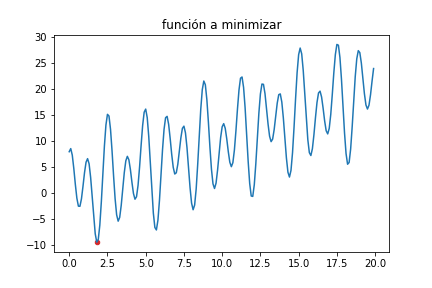

In [102]:
plt.close('all')
x = np.arange(-0, 20, 0.1)
y2 = func_2(x)
plt.figure()
min=np.argmin(y2)
plt.plot(x, y2), plt.title('función a minimizar')
plt.scatter(x[min], y2[min], s=20, c='C3')

# alg_enjambre (particulas, lim_inf, lim_sup, f, c1, c2)
winner, anim_x, anim_y = alg_enjambre(7,0,20,func_2,1.2,1)
print(f'mínimo encontrado en el punto ({winner}, {func_2(winner)})')
print(f'llegó en {len(anim_x)} iteraciones')

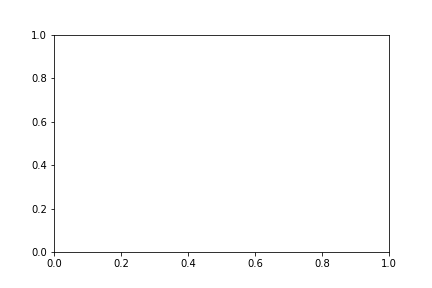

In [103]:
# animación
fig, ax = plt.subplots(1, 1)

def animate(i):
    ax.clear()
    point_x = anim_x[i]
    point_y = anim_y[i]
    ax.scatter(point_x, point_y, c = 'green')
    ax.set_title(f'Partículas it {i + 1}')
anim = FuncAnimation(fig, animate, frames=len(anim_x),
                    interval=500, repeat=False)


## Resolución de la función 3

In [104]:
# Función a minimizar 

x = np.linspace(-100, 100, 10000)
y = np.linspace(-100, 100, 10000)

X, Y = np.meshgrid(x, y)
Z = func_3(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='summer')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Función a minimizar')
min = np.argmin(func_3(x, y))
ax.scatter(x[min], y[min], np.min(Z), c='C3')
plt.show()

In [ ]:
print(f'mínimo en: ({x[min]}, {y[min]}, {np.min(Z)})')

# alg_enjambre (particulas, lim_inf, lim_sup, f, c1, c2)
winner, anim_x, anim_y = alg_enjambre(400,-100,100,func_3,0.05,0.01)
print(f'mínimo encontrado en ({winner[0]},{winner[1]},{func_3(winner[0],winner[1])})')

mínimo en: (1.8, -96.3963963963964, 0.5467853625415365)
mínimo encontrado en (-0.05618945996151973,-0.07765541022465783,0.3151447009705671)
0.3151447009705671
